### makemore: lect01

In [1]:
import numpy as np
import torch
import torch.nn.functional as F

#### day0: 
- 20240227-061500-073000; 
- 20240227-075000-080500;
- 20240227-190500-200500;

In [2]:
words = open("names.txt", "r").read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words[:3]:
    print("-" * 80)
    chs = ["<S>"] + list(w) + ["E"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1, ch2)

--------------------------------------------------------------------------------
<S> e
e m
m m
m a
a E
--------------------------------------------------------------------------------
<S> o
o l
l i
i v
v i
i a
a E
--------------------------------------------------------------------------------
<S> a
a v
v a
a E


In [7]:
sorted(b.items(), key = lambda kv: -kv[1])[:10]

[(('a', 'E'), 3),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1)]

In [8]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', 'E'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

get all counts 

In [9]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["E"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [10]:
sorted(b.items(), key=lambda u: -u[1])[:10]

[(('n', 'E'), 6763),
 (('a', 'E'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', 'E'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [11]:
import torch

In [12]:
a = torch.zeros((3, 5))

In [13]:
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [14]:
a.dtype

torch.float32

In [15]:
a = torch.zeros((3, 5), dtype=torch.int32)

In [16]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [17]:
a[1, 3] = 1

In [18]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [19]:
a[1, 3] += 1

In [20]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [21]:
# counts
N = torch.zeros((28, 28), dtype=torch.int32)

In [22]:
sorted(list(set("".join(words))))[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [23]:
chars = sorted(list(set("".join(words))))
stoi = {s: i for i, s in enumerate(chars)}
stoi["<S>"] = 26
stoi["<E>"] = 27

In [24]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [25]:
itos = {i: s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [26]:
# # counts
# N = torch.zeros((28, 28), dtype=torch.int32)
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[(ix1, ix2)] += 1

In [27]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

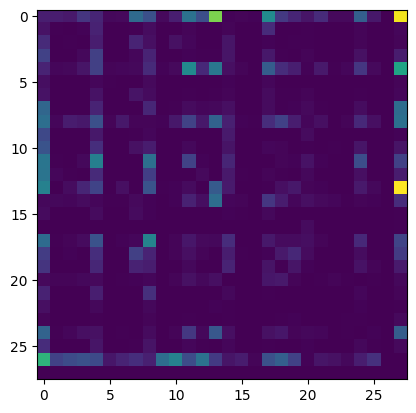

In [29]:
plt.imshow(N)

(-0.5, 27.5, 27.5, -0.5)

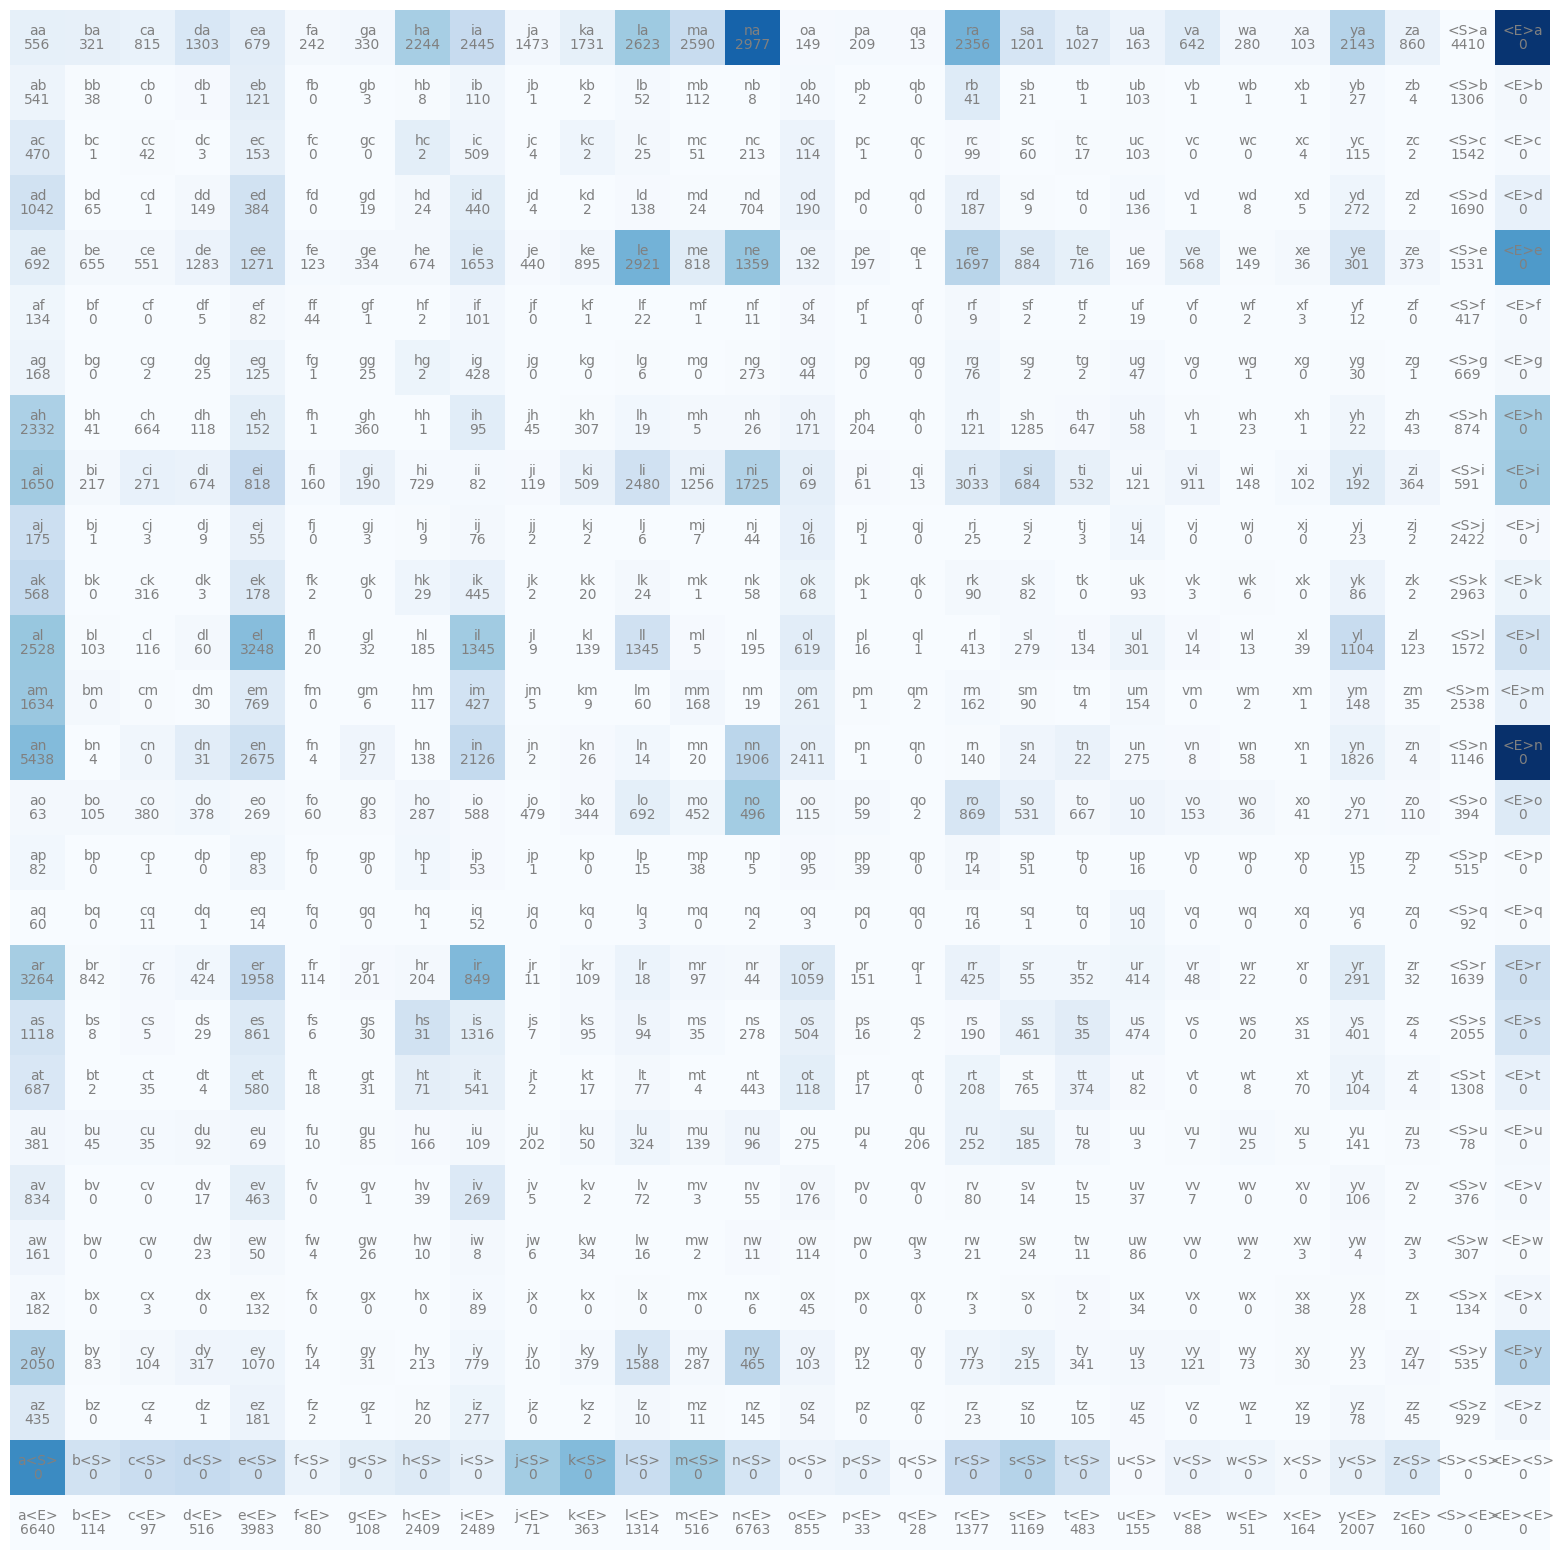

In [30]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap="Blues")
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(i, j, chstr, ha="center", va="bottom", color="gray")
        plt.text(i, j, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

### now we introduce a new special character only `.` insted of `<S>` and `<E>`

In [31]:
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0

In [32]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [33]:
itos = {i: s for s, i in stoi.items()}

In [34]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [35]:
# # counts
# N = torch.zeros((28, 28), dtype=torch.int32)

N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[(ix1, ix2)] += 1

(-0.5, 26.5, 26.5, -0.5)

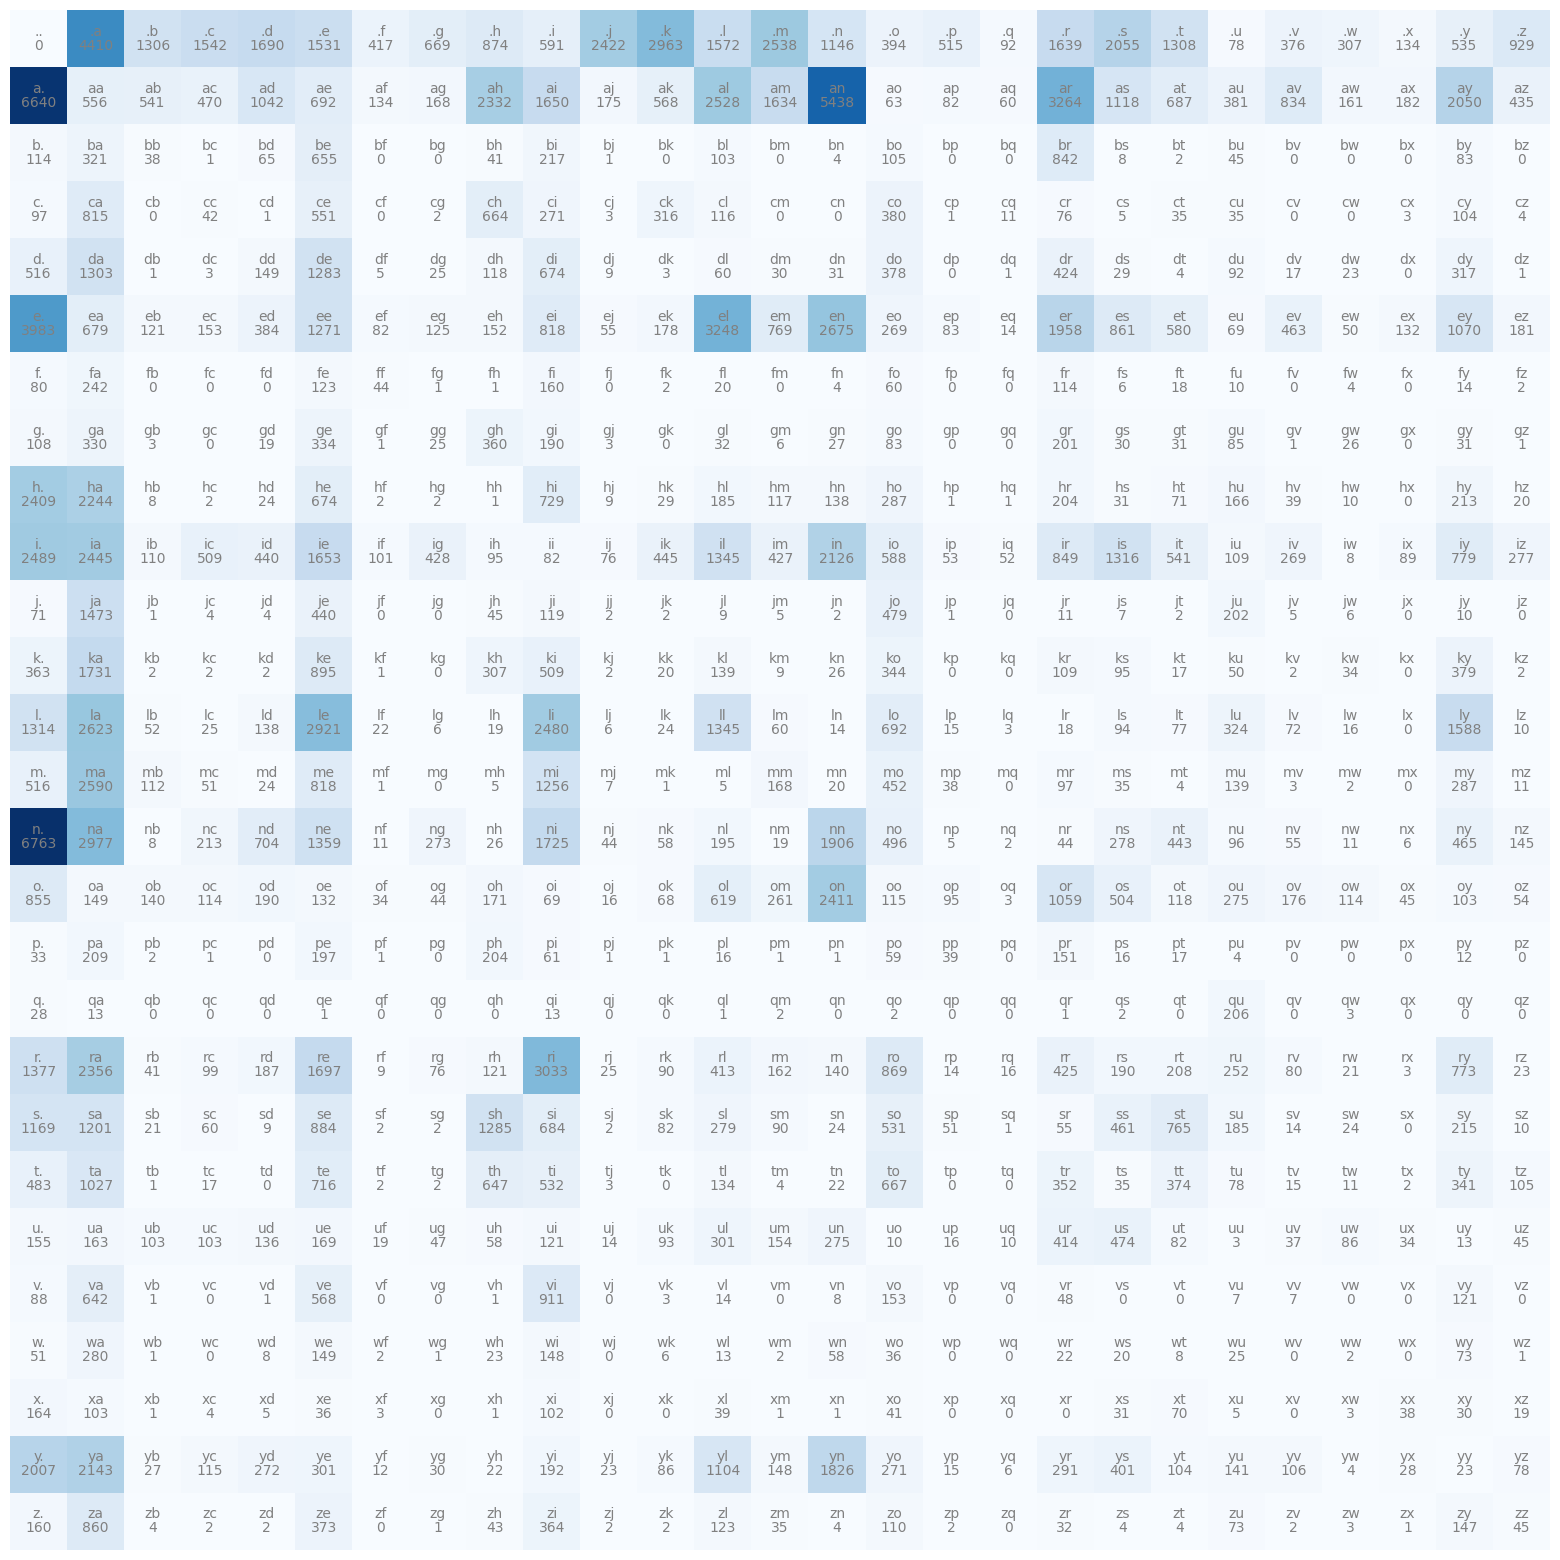

In [36]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap="Blues")
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [37]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [38]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [39]:
N[0].shape

torch.Size([27])

In [40]:
p = N[0].float() / N[0].sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [41]:
p.sum()

tensor(1.)

In [42]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix, itos[ix]

(10, 'j')

In [43]:
normalize = lambda u: u / u.sum()

In [44]:
NN = torch.ones(3, 5)
NN

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [45]:
1/5/3

0.06666666666666667

In [46]:
normalize(NN)

tensor([[0.0667, 0.0667, 0.0667, 0.0667, 0.0667],
        [0.0667, 0.0667, 0.0667, 0.0667, 0.0667],
        [0.0667, 0.0667, 0.0667, 0.0667, 0.0667]])

In [47]:
# N[3, 9], N[9, 3]

In [48]:
N.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [49]:
N.sum(1, keepdim=False).shape

torch.Size([27])

In [50]:
(N / N.sum(1, keepdim=False)).shape

torch.Size([27, 27])

In [51]:
(N / N.sum(1, keepdim=True)).shape

torch.Size([27, 27])

In [52]:
P = N / N.sum(1, keepdim=True)

--- 

check first 10 rows if they sum up to one; 


In [53]:
for i in range(10):
    print(f"row {i}; sum: {P[i].sum()}")

row 0; sum: 1.0
row 1; sum: 1.0
row 2; sum: 1.0
row 3; sum: 0.9999999403953552
row 4; sum: 1.0
row 5; sum: 1.0
row 6; sum: 1.0
row 7; sum: 0.9999999403953552
row 8; sum: 0.9999999403953552
row 9; sum: 0.9999999403953552


--- 
example with a random generator

In [54]:
g = torch.Generator().manual_seed(2147483647)
pp = torch.rand(3, generator=g)
pp = pp / pp.sum()
pp

tensor([0.6064, 0.3033, 0.0903])

In [55]:
samples = torch.multinomial(pp, num_samples=100, replacement=True, generator=g)
samples

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [56]:
(samples==0).sum(), (samples==1).sum(), (samples==2).sum()

(tensor(61), tensor(33), tensor(6))

In [57]:
p.size()

torch.Size([27])

In [58]:
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
    out = []
    ix = 0 
    while True:
        # get prob. distribution
        # p = N[ix].float() / N[ix].sum()
        # p = torch.ones(27) / 27
        p = P[ix]
        # get next index
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        ch = itos[ix]
        out.append(ch)
        if ix == 0:
            break
    
    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


### broadcasting

- https://numpy.org/doc/stable/user/basics.broadcasting.html
- https://pytorch.org/docs/stable/notes/broadcasting.html

### day02

- 20240228-062000-?

In [59]:
# x=torch.empty(5,7,3)
# y=torch.empty(5,7,3)

# x=torch.empty((0,))
# y=torch.empty(2,2)

# x=torch.empty(5,3,4,1)
# y=torch.empty(  3,1,1)

# x=torch.empty(5,2,4,1)
# y=torch.empty(  3,1,1)

### In-place semantics

One complication is that in-place operations do not allow the in-place tensor to change shape as a result of the broadcast.

In [60]:
x = torch.empty(5,3,4,1)
y = torch.empty(3,1,1)
(x.add_(y)).size()

torch.Size([5, 3, 4, 1])

In [61]:
# x = torch.empty(1,3,1)
# y = torch.empty(3,1,7)
# (x.add_(y)).size()

### Backwards compatibility

- note that the following example results in a tensor of shape (4, 4), and not in one of shape (4, 1)

In [62]:
torch.utils.backcompat.broadcast_warning.enabled=True

torch.add(
    torch.ones(4,1), 
    torch.ones(4),
)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [63]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [64]:
N.shape

torch.Size([27, 27])

In [65]:
N.sum?

Docstring:
sum(dim=None, keepdim=False, dtype=None) -> Tensor

See :func:`torch.sum`
Type:      builtin_function_or_method

### torch sum 

- https://pytorch.org/docs/stable/generated/torch.sum.html

In [66]:
a = torch.randn(4, 4)
a

tensor([[-1.1770, -1.2704, -0.8009, -0.1289],
        [-2.1052, -0.7539,  0.5475,  0.4665],
        [-1.0567, -0.1991,  0.2117,  1.3156],
        [ 0.4212, -0.5081, -2.0803,  2.1717]])

In [67]:
a.sum(1), a.sum(1).shape

(tensor([-3.3771, -1.8451,  0.2715,  0.0044]), torch.Size([4]))

In [68]:
a[0], a[0].sum()

(tensor([-1.1770, -1.2704, -0.8009, -0.1289]), tensor(-3.3771))

In [69]:
a[1], a[1].sum()

(tensor([-2.1052, -0.7539,  0.5475,  0.4665]), tensor(-1.8451))

In [70]:
a[2], a[2].sum()

(tensor([-1.0567, -0.1991,  0.2117,  1.3156]), tensor(0.2715))

In [71]:
a[3], a[3].sum()

(tensor([ 0.4212, -0.5081, -2.0803,  2.1717]), tensor(0.0044))

---

So `a.sum(1)` is of the shape `torch.Size([4]))` has elements as sums over rows; and the values are equal to: 

`a[0].sum()`, `a[1].sum()`, `a[2].sum()`, `a[3].sum()`.

---

### Check the dimensions


In [72]:
torch.Size([4]) == (4, )

True

In [73]:
torch.Size([4]) == 4

False

In [74]:
torch.Size([4]) == [4]

False

In [75]:
torch.Size([4]) == (4)

False

### Check when `keepdim`

In [76]:
a.sum(1, keepdim=True)

tensor([[-3.3771],
        [-1.8451],
        [ 0.2715],
        [ 0.0044]])

In [77]:
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
b

tensor([[[  0,   1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17],
         [ 18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29]],

        [[ 30,  31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40,  41],
         [ 42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53],
         [ 54,  55,  56,  57,  58,  59]],

        [[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[ 90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101],
         [102, 103, 104, 105, 106, 107],
         [108, 109, 110, 111, 112, 113],
         [114, 115, 116, 117, 118, 119]]])

In [78]:
b.shape

torch.Size([4, 5, 6])

### Difference when `keepdim` in `torch.sum` is `True` or `False`

In [79]:
torch.sum(b, (2, 1)), torch.sum(b, (2, 1)).shape

(tensor([ 435, 1335, 2235, 3135]), torch.Size([4]))

In [80]:
torch.sum(b, (2, 1), keepdim=True), torch.sum(b, (2, 1), keepdim=True).shape

(tensor([[[ 435]],
 
         [[1335]],
 
         [[2235]],
 
         [[3135]]]),
 torch.Size([4, 1, 1]))

---

This should sum up all elements

In [81]:
torch.sum(b, (2, 1, 0))

tensor(7140)

In [82]:
119 * 120 / 2 ### a sum of first 120 numbers 0 to 119 (double check the previous result)

7140.0

---

the order of dimensions do not mater (0, 1) or (1, 0) since those are summed up over

In [83]:
torch.sum(b, (1, 0)), torch.sum(b, (0, 1))

(tensor([1140, 1160, 1180, 1200, 1220, 1240]),
 tensor([1140, 1160, 1180, 1200, 1220, 1240]))

### let us introduce an estimate for error for the model

In [84]:
log_likelihood = 0.0

cnt = 0 
# for w in words[:3]:
# for w in words:
for w in ["andrejq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{ch1}{ch2}: {prob:0.4f} {logprob:0.4f}")
        cnt += 1
        
print(f"{log_likelihood = }")

# negative log_likelihood
nnl = - log_likelihood
print(f"{nnl = } ")

# average negative log_likelihood
print(f"{nnl / cnt = } ")

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
jq: 0.0000 -inf
q.: 0.1029 -2.2736
log_likelihood = tensor(-inf)
nnl = tensor(inf) 
nnl / cnt = tensor(inf) 


In [85]:
P.shape

torch.Size([27, 27])

### model smottohing 

- add `1` to counts in the matrix `N`, and recompute prob. matrix `P` 
- otherwise e.g. `qj` never appears and `log(P[q, j]) = -inf`

In [86]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [87]:
N[stoi["j"], stoi["q"]], N[stoi["q"], stoi["j"]]

(tensor(0, dtype=torch.int32), tensor(0, dtype=torch.int32))

In [88]:
P[stoi["j"], stoi["q"]], P[stoi["q"], stoi["j"]]

(tensor(0.0003), tensor(0.0033))

### create the training data set (x, y)

- idea is to go over all bigrmas; and for the first char the questions is what is a next char


In [89]:
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [90]:
xs.shape, ys.shape

(torch.Size([5]), torch.Size([5]))

In [91]:
xs

tensor([ 0,  5, 13, 13,  1])

In [92]:
ys

tensor([ 5, 13, 13,  1,  0])

In [93]:
import torch.nn.functional as F

In [94]:
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [95]:
xenc.shape

torch.Size([5, 27])

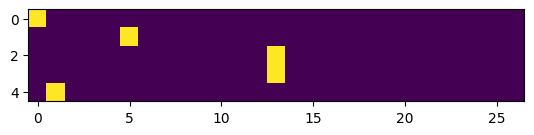

In [96]:
plt.imshow(xenc)

In [97]:
xenc.dtype

torch.int64

---

however we want to give `floats` as an input to a neural network. 
so instead we use the following cast:

In [98]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [99]:
xenc.dtype

torch.float32

In [100]:
W = torch.randn(27, 1)

In [101]:
W.shape, xenc.shape

(torch.Size([27, 1]), torch.Size([5, 27]))

In [102]:
W

tensor([[-1.4693],
        [-0.4036],
        [ 2.3762],
        [ 0.9874],
        [-1.0538],
        [-1.4311],
        [ 1.1133],
        [ 0.4815],
        [-0.0608],
        [-0.2866],
        [ 0.0771],
        [ 1.0517],
        [-1.1789],
        [-1.1882],
        [-0.2760],
        [ 0.3870],
        [-0.3993],
        [-0.3942],
        [-0.8498],
        [-0.2806],
        [-0.1797],
        [-0.9444],
        [ 1.3023],
        [-1.2599],
        [ 1.3600],
        [ 0.0263],
        [ 0.1035]])

In [103]:
xenc @ W

tensor([[-1.4693],
        [-1.4311],
        [-1.1882],
        [-1.1882],
        [-0.4036]])

In [104]:
W = torch.randn(27, 27)
xenc @ W

tensor([[-0.5376, -1.0604,  0.4930,  0.7114, -0.1190, -1.6432,  0.3116,  0.4563,
         -1.1468, -0.0060, -0.4198, -0.5951,  0.2861, -0.9071, -1.4886,  0.3493,
         -0.2754, -1.8747,  0.7658,  0.6113, -1.7225, -3.9603,  0.4109, -0.6744,
         -0.4418,  0.4266,  0.5100],
        [-0.1353, -0.3048, -0.0635, -0.6321, -0.4970, -0.9947, -0.4485, -0.0210,
         -0.6942,  1.2113, -0.0896, -1.3955,  2.0086,  0.1770, -0.3629,  1.2407,
          0.0490,  1.2177,  1.5400, -1.1526, -0.1728,  1.5589,  0.6922,  0.3125,
         -0.2297, -0.1188, -0.8724],
        [-1.3170, -0.1242,  0.3314,  0.0323,  1.4707, -0.4424,  1.2782,  1.3745,
          1.0713, -0.5644,  1.5157, -1.7949,  0.1738,  1.4101, -0.0882, -0.3814,
          0.3501, -1.5763, -0.4551,  0.9562,  0.0833,  0.2121,  0.8684, -1.0653,
         -2.1449, -0.8203, -0.9466],
        [-1.3170, -0.1242,  0.3314,  0.0323,  1.4707, -0.4424,  1.2782,  1.3745,
          1.0713, -0.5644,  1.5157, -1.7949,  0.1738,  1.4101, -0.0882, -0.3814

In [105]:
logits = xenc @ W
logits.shape

torch.Size([5, 27])

In [106]:
counts = logits.exp()

In [107]:
counts.shape

torch.Size([5, 27])

In [108]:
counts

tensor([[0.5841, 0.3463, 1.6372, 2.0368, 0.8878, 0.1934, 1.3656, 1.5782, 0.3176,
         0.9940, 0.6571, 0.5515, 1.3313, 0.4037, 0.2257, 1.4181, 0.7593, 0.1534,
         2.1508, 1.8429, 0.1786, 0.0191, 1.5082, 0.5095, 0.6429, 1.5320, 1.6652],
        [0.8734, 0.7373, 0.9385, 0.5315, 0.6084, 0.3698, 0.6386, 0.9792, 0.4995,
         3.3578, 0.9143, 0.2477, 7.4531, 1.1936, 0.6957, 3.4580, 1.0502, 3.3795,
         4.6644, 0.3158, 0.8413, 4.7534, 1.9981, 1.3668, 0.7948, 0.8880, 0.4180],
        [0.2680, 0.8832, 1.3928, 1.0328, 4.3521, 0.6425, 3.5901, 3.9532, 2.9192,
         0.5687, 4.5527, 0.1661, 1.1898, 4.0962, 0.9156, 0.6829, 1.4193, 0.2067,
         0.6344, 2.6018, 1.0869, 1.2362, 2.3831, 0.3446, 0.1171, 0.4403, 0.3881],
        [0.2680, 0.8832, 1.3928, 1.0328, 4.3521, 0.6425, 3.5901, 3.9532, 2.9192,
         0.5687, 4.5527, 0.1661, 1.1898, 4.0962, 0.9156, 0.6829, 1.4193, 0.2067,
         0.6344, 2.6018, 1.0869, 1.2362, 2.3831, 0.3446, 0.1171, 0.4403, 0.3881],
        [0.2247, 1.0478,

In [109]:
counts.sum(dim=1, keepdim=True)

tensor([[25.4902],
        [43.9667],
        [42.0645],
        [42.0645],
        [41.8848]])

In [110]:
counts[0].sum()

tensor(25.4902)

In [111]:
counts / counts.sum(dim=1, keepdim=True)

tensor([[0.0229, 0.0136, 0.0642, 0.0799, 0.0348, 0.0076, 0.0536, 0.0619, 0.0125,
         0.0390, 0.0258, 0.0216, 0.0522, 0.0158, 0.0089, 0.0556, 0.0298, 0.0060,
         0.0844, 0.0723, 0.0070, 0.0007, 0.0592, 0.0200, 0.0252, 0.0601, 0.0653],
        [0.0199, 0.0168, 0.0213, 0.0121, 0.0138, 0.0084, 0.0145, 0.0223, 0.0114,
         0.0764, 0.0208, 0.0056, 0.1695, 0.0271, 0.0158, 0.0786, 0.0239, 0.0769,
         0.1061, 0.0072, 0.0191, 0.1081, 0.0454, 0.0311, 0.0181, 0.0202, 0.0095],
        [0.0064, 0.0210, 0.0331, 0.0246, 0.1035, 0.0153, 0.0853, 0.0940, 0.0694,
         0.0135, 0.1082, 0.0039, 0.0283, 0.0974, 0.0218, 0.0162, 0.0337, 0.0049,
         0.0151, 0.0619, 0.0258, 0.0294, 0.0567, 0.0082, 0.0028, 0.0105, 0.0092],
        [0.0064, 0.0210, 0.0331, 0.0246, 0.1035, 0.0153, 0.0853, 0.0940, 0.0694,
         0.0135, 0.1082, 0.0039, 0.0283, 0.0974, 0.0218, 0.0162, 0.0337, 0.0049,
         0.0151, 0.0619, 0.0258, 0.0294, 0.0567, 0.0082, 0.0028, 0.0105, 0.0092],
        [0.0054, 0.0250,

In [112]:
(counts / counts.sum(dim=1, keepdim=True))[0].sum()

tensor(1.0000)

In [113]:
counts.sum(dim=1).shape

torch.Size([5])

In [114]:
probs = counts / counts.sum(dim=1, keepdim=True)

In [115]:
probs

tensor([[0.0229, 0.0136, 0.0642, 0.0799, 0.0348, 0.0076, 0.0536, 0.0619, 0.0125,
         0.0390, 0.0258, 0.0216, 0.0522, 0.0158, 0.0089, 0.0556, 0.0298, 0.0060,
         0.0844, 0.0723, 0.0070, 0.0007, 0.0592, 0.0200, 0.0252, 0.0601, 0.0653],
        [0.0199, 0.0168, 0.0213, 0.0121, 0.0138, 0.0084, 0.0145, 0.0223, 0.0114,
         0.0764, 0.0208, 0.0056, 0.1695, 0.0271, 0.0158, 0.0786, 0.0239, 0.0769,
         0.1061, 0.0072, 0.0191, 0.1081, 0.0454, 0.0311, 0.0181, 0.0202, 0.0095],
        [0.0064, 0.0210, 0.0331, 0.0246, 0.1035, 0.0153, 0.0853, 0.0940, 0.0694,
         0.0135, 0.1082, 0.0039, 0.0283, 0.0974, 0.0218, 0.0162, 0.0337, 0.0049,
         0.0151, 0.0619, 0.0258, 0.0294, 0.0567, 0.0082, 0.0028, 0.0105, 0.0092],
        [0.0064, 0.0210, 0.0331, 0.0246, 0.1035, 0.0153, 0.0853, 0.0940, 0.0694,
         0.0135, 0.1082, 0.0039, 0.0283, 0.0974, 0.0218, 0.0162, 0.0337, 0.0049,
         0.0151, 0.0619, 0.0258, 0.0294, 0.0567, 0.0082, 0.0028, 0.0105, 0.0092],
        [0.0054, 0.0250,

In [116]:
probs[0].sum()

tensor(1.0000)

In [117]:
probs[:, 0].sum()

tensor(0.0609)

In [118]:
xs

tensor([ 0,  5, 13, 13,  1])

### now let us implmenet the loop

In [119]:
xs

tensor([ 0,  5, 13, 13,  1])

In [120]:
ys

tensor([ 5, 13, 13,  1,  0])

In [170]:
g = torch.Generator().manual_seed(2147483647)

In [171]:
W = torch.randn((27, 27), generator=g)

In [172]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

In [183]:
log_likelihood = 0.0

nnls = torch.zeros(5)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
   
    print("-" * 80)
    print(f"step: {i}")
    print(f"bigram examples: {itos[x]}{itos[y]}; indexes {x, y};")
    print(f"input to the NN: {x}; {itos[x]}")
    print(f"actual next characater: {y}, {itos[y]}")
    print(f"output probs from the NN are:\n{probs[i]}")
    p = probs[i, y]
    print(f"probability assigned by the NN to the next correct char: {p.item()}")
    p = probs[i, y]
    logp = torch.log(p)
    print(f"log-likelihood: {logp.item()}")
    nnl = -logp
    print(f"negative log-likelihood: {nnl.item()}")
    nnls[i] = nnl

print("=" * 80)
print(f"{log_likelihood = }")
print(f"{nnls = } ")
print("average negative log_likelihood, i.e. loss:", nnls.mean().item())

--------------------------------------------------------------------------------
step: 0
bigram examples: .e; indexes (0, 5);
input to the NN: 0; .
actual next characater: 5, e
output probs from the NN are:
tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
probability assigned by the NN to the next correct char: 0.01228625513613224
log-likelihood: -4.399273872375488
negative log-likelihood: 4.399273872375488
--------------------------------------------------------------------------------
step: 1
bigram examples: em; indexes (5, 13);
input to the NN: 5; e
actual next characater: 13, m
output probs from the NN are:
tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.04

### introduce the gradients

In [184]:
xs

tensor([ 0,  5, 13, 13,  1])

In [185]:
probs.shape

torch.Size([5, 27])

In [186]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[4, 1]

(tensor(0.0123), tensor(0.0181), tensor(0.0267), tensor(0.0086))

In [187]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [188]:
ys

tensor([ 5, 13, 13,  1,  0])

In [189]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [190]:
probs[torch.arange(5), ys].log()

tensor([-4.3993, -4.0146, -3.6234, -2.6081, -4.2012])

In [191]:
- probs[torch.arange(5), ys].log().mean()

tensor(3.7693)

In [192]:
loss = - probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

### optimization

In [200]:
# init
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [214]:
# forward pass
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = - probs[torch.arange(5), ys].log().mean()

In [215]:
# backward pass
W.grad = None # set to `zero` gradients but more efficient
loss.backward()

In [216]:
print(loss.item())

3.7291417121887207


In [205]:
W.shape

torch.Size([27, 27])

In [208]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [212]:
# update
W.data += -0.1 * W.grad

### now make the training loop
### gradient descent


In [232]:
# init
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [233]:
for t in range(100):
    
    # forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = - probs[torch.arange(5), ys].log().mean()

    # backward pass
    W.grad = None # set to `zero` gradients but more efficient
    loss.backward()
    print(t, loss.item())
    
    # update
    W.data += -0.1 * W.grad

0 3.7693049907684326
1 3.7492127418518066
2 3.7291626930236816
3 3.7091541290283203
4 3.6891887187957764
5 3.6692662239074707
6 3.6493873596191406
7 3.629552125930786
8 3.6097614765167236
9 3.5900158882141113
10 3.5703155994415283
11 3.5506606101989746
12 3.5310521125793457
13 3.5114905834198
14 3.491975784301758
15 3.4725089073181152
16 3.453089952468872
17 3.4337196350097656
18 3.414397716522217
19 3.3951258659362793
20 3.375903367996216
21 3.356731414794922
22 3.3376102447509766
23 3.318540096282959
24 3.2995219230651855
25 3.2805557250976562
26 3.26164174079895
27 3.242781162261963
28 3.2239737510681152
29 3.2052199840545654
30 3.18652081489563
31 3.1678762435913086
32 3.1492867469787598
33 3.1307530403137207
34 3.1122748851776123
35 3.09385347366333
36 3.075488567352295
37 3.0571811199188232
38 3.0389316082000732
39 3.0207395553588867
40 3.0026066303253174
41 2.984531879425049
42 2.9665169715881348
43 2.948561191558838
44 2.930665969848633
45 2.9128310680389404
46 2.89505696296691